# 머신러닝 실습(회귀)
> 회귀 : X데이터(독립변수, 피처)와 y 데이터(종속변수, 타깃) 간의 관계를 모델링하고, 새로 주어진 X데이터에 대해 연속적인 값을 예측한다.

- 회귀인지 분류인지 알 수 있는 방법
    - label(target)이 어떤 컬럼인지 파악, 예를 들어 수요량, 접속량, 사용량, 판매량 등이 될 수 있다.
    - 데이터 샘플을 확인했을 때 연속형 숫자인지, 몇몇 값이 반복되는 카테고리인지 확인한다.
        - df['target'].value_counts()로 확인했을 때 종류가 많으면 회귀고, 한눈에 들어오면 분류일 가능성이 크다.
    - 평가지표를 확인한다. 예를 들어, MAE, MSE, RMSE 등 E(Error)가 붙어있으면 회귀다.

## 1 문제 정의
- 10개의 아울렛 매장에서 1,500여개의 제품에 대한 판매 데이터를 수집했다.
- 예측 모델을 만들고 아울렛 특정 매장에서 각 제품의 판매금액을 예측하시오.
    - 평가 기준은 RMSE로 평가
    - label(target)은 판매금액(Item_Outlet_Sales)
    - 제출 파일을 예측값만 result.csv 파일로 생성해 제출(컬럼명 : pred, 1개)

## 2 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## 3 탐색적 데이터 분석 (EDA)

In [2]:
print(train.shape,test.shape)

(6818, 12) (1705, 11)


In [3]:
train.head() # Item_Outlet_Sales : target(label) 컬럼(금액이고 소수점이 있는 숫자)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR06,12.500,Low Fat,0.006760,Household,42.8112,OUT013,1987,High,Tier 3,Supermarket Type1,639.1680
1,FDW11,12.600,Low Fat,0.048741,Breads,60.4194,OUT013,1987,High,Tier 3,Supermarket Type1,990.7104
2,FDH32,12.800,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,1987,High,Tier 3,Supermarket Type1,2799.6890
3,FDL52,6.635,Regular,0.046351,Frozen Foods,37.4506,OUT017,2007,NaN,Tier 2,Supermarket Type1,1176.4686
4,FDO09,13.500,Regular,0.125170,Snack Foods,261.4910,OUT013,1987,High,Tier 3,Supermarket Type1,3418.8830


In [4]:
train.info() # float 4개, int 1개, object 7개개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


- median(50%) > mean인 경우 : 왼쪽 꼬리가 긴 분포 (Negative Skew)
- median(50%) < mean인 경우 : 오른쪽 꼬리가 긴 분포 (Positive Skew)

In [5]:
train.describe() # Item_Outlet_Sales 컬럼 median(50%) < mean이므로 데이터 모양이 오른쪽 꼬리가 긴 분포의 모양을 한다고 추측 할 수 있다.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

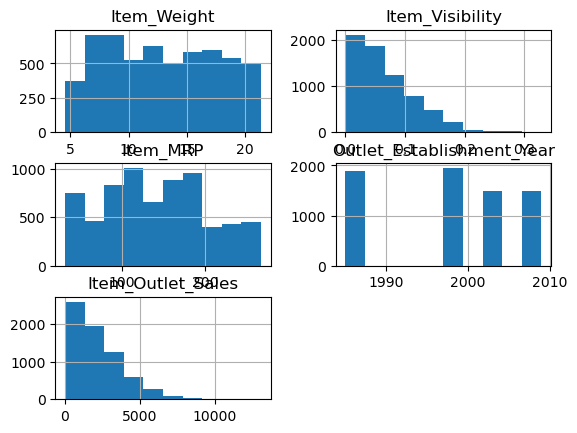

In [6]:
train.hist()

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# object 컬럼의 unique 개수를 확인
train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4878,6818,6818
unique,1554,5,16,10,3,3,4
top,FDW26,Low Fat,Snack Foods,OUT046,Medium,Tier 3,Supermarket Type1
freq,9,4092,963,763,2228,2664,4474


In [9]:
test.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,1705,1705,1705,1705,1235,1705,1705
unique,1077,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,4,997,272,207,565,686,1103


In [10]:
# 결측치 확인
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1162
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1940
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test.isnull().sum()

Item_Identifier                0
Item_Weight                  301
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  470
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

## 4 데이터 전처리

In [12]:
# object 컬럼만 리스트로 만든다
list(train.columns[train.dtypes==object])

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
cols = list(train.columns[train.dtypes==object])
cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:
# target 컬럼을 변수에 옯겨두고 데이터를 합쳐서 인코딩한다.
target = train.pop('Item_Outlet_Sales')
print(train.shape,test.shape)

# 인코딩을 위해 train과 test 병합
df = pd.concat([train,test])
df.shape

(6818, 11) (1705, 11)


(8523, 11)

In [15]:
# Item_Identifier는 train과 test의 카테고리(종류)가 달라 모델 학습 시 에러가 발생한다.
# 데이터셋을 합쳐서 진행하거나, Item_Identifier를 제거하는 방법도 있다.

### 레이블 인코딩

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

### 데이터 다시 분할

In [17]:
train = df.iloc[:len(train)].copy()
test = df.iloc[len(train):].copy()
train.shape, test.shape

((6818, 11), (1705, 11))

### 결측치 채우기

In [18]:
# 결측치를 최솟값과 최빈값으로 채운다.
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

test['Item_Weight'] = test['Item_Weight'].fillna(train['Item_Weight'].min())
test['Outlet_Size'] = test['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [19]:
# 전처리 중 스케일링, 이상치 등은 선택이므로 생략한다.
# item_id는 삭제
train.drop('Item_Identifier', axis=1, inplace=True) # axis = 1 -> 열 삭제
test.drop('Item_Identifier', axis=1, inplace=True)

train.shape, test.shape

((6818, 10), (1705, 10))

## 5 검증 데이터 나누기
- 데이터를 학습용과 검증용으로 나눌 때 주의해야 할 사항
    1. 학습 데이터(X)에는 타깃 변수(y)를 포함시키지 않아야 한다. (타깃 변수를 포함시키게 되면 모델은 이미 정답을 알고 있게 된다. 마치 시험 문제지에 답이 이미 제공된 것과 같아서 모델이 실제로 예측 능력을 갖췄는지 평가할 수 없게 만든다.
    2. 타깃 데이터(y)는 데이터프레임에서 단일 컬럼을 선택해 시리즈 형태로 있어야 한다.
    3. random_state 값을 설정해 고정시키면 코드를 실행할 때마다 동일한 방식으로 데이터가 나눠진다. 일관되게 평가가능하다.

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(
    train,
    target,
    test_size = 0.2,
    random_state= 0 
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5454, 10), (1364, 10), (5454,), (1364,))

## 6 머신러닝 학습 및 평가

### 선형 회귀 (Linear Regression)
    MSE, MAE, RMSE는 낮을수록 좋고, R^2은 1에 가까울수록 좋다.


In [21]:
# 선형회귀
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

def rmse(y_val,y_pred):
    return mean_squared_error(y_val,y_pred) ** 0.5

lr = LinearRegression()
lr.fit(X_train,y_train) # train 데이터 학습
y_pred = lr.predict(X_val) # 검증 데이터 예측

result = mean_squared_error(y_val,y_pred)
print(f'MSE : {result}')

result = mean_absolute_error(y_val,y_pred)
print(f'MAE : {result}')

result = r2_score(y_val,y_pred)
print(f'r2 스코어 : {result}')

result = rmse(y_val,y_pred)
print(f'RMSE : {result}')

MSE : 1282923.0729833895
MAE : 865.1968401416271
r2 스코어 : 0.5058168396924843
RMSE : 1132.6619411737067


### 랜덤포레스트

In [22]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

result = mean_squared_error(y_val,y_pred)
print(f'MSE : {result}')

result = mean_absolute_error(y_val,y_pred)
print(f'MAE : {result}')

result = r2_score(y_val,y_pred)
print(f'r2 스코어 : {result}')

result = rmse(y_val,y_pred)
print(f'RMSE : {result}')

MSE : 1101802.8117346708
MAE : 747.2971172067448
r2 스코어 : 0.5755845326933362
RMSE : 1049.6679530854844


### LightGBM

In [23]:
# LightGBM
import lightgbm as lgb

model = lgb.LGBMRegressor(random_state=0, verbose = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

result = mean_squared_error(y_val,y_pred)
print(f'MSE : {result}')

result = mean_absolute_error(y_val,y_pred)
print(f'MAE : {result}')

result = r2_score(y_val,y_pred)
print(f'r2 스코어 : {result}')

result = rmse(y_val,y_pred)
print(f'RMSE : {result}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 10
[LightGBM] [Info] Start training from score 2202.546849
MSE : 1115654.3482227568
MAE : 736.6367966578568
r2 스코어 : 0.5702489079618556
RMSE : 1056.2454015155554


## 7 예측 및 결과 파일 생성

In [24]:
pred = model.predict(test)
pred

array([1226.50504175,  830.18920951, 1788.76644309, ..., 3666.34876099,
        990.65125496, 1224.1960178 ])

In [25]:
submit = pd.DataFrame({'pred':pred})
submit.to_csv('result.csv',index = False)

In [26]:
submit_read = pd.read_csv('./result.csv')
submit_read.head()

,pred
0,1226.505042
1,830.189210
2,1788.766443
3,1644.510784
4,2831.798098
